In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def gd(lambda_d, rho0, mu, z, theta_d):
    return lambda_d / (lambda_d + mu) * (1 - rho0) * theta_d ** (z - 2) * ((z * (z - 1))/2 + z * (2 - z) * theta_d + ((z - 1) * (z - 2)) / 2 * theta_d ** 2) + mu / (lambda_d + mu) - theta_d

def gd_prime(lambda_d, rho0, mu, z, theta_d):
    return lambda_d / (lambda_d + mu) * (1 - rho0) * (z * (z - 1) * (z - 2)) / 2 * (1 - theta_d) ** 2 * theta_d ** (z - 3) - 1

def gd_prime_prime(lambda_d, rho0, mu, z, theta_d):
    return lambda_d / (lambda_d + mu) * (1 - rho0) * (z * (z - 1) * (z - 2)) / 2 * (1 - theta_d) * theta_d ** (z - 4) * ((z - 3) * (1 - theta_d) - 2 * theta_d)

def gd_one_step(lambda_d, rho0, mu, z, theta_d):
    return - lambda_d * rho0 / (lambda_d + mu)

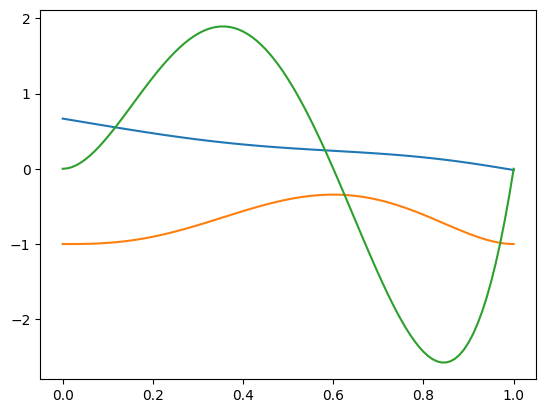

In [3]:
# lambda_d_min = 0.0
# lambda_d_max = 10.0
# dlambda_d = 0.1
# lambda_d_values = np.arange(lambda_d_min, lambda_d_max + dlambda_d, dlambda_d)
lambda_d = 0.5
rho0 = 0.05
mu = 1.0
z = 6

theta_d_min = 0.0   
theta_d_max = 1.0
dtheta_d = 0.01
theta_d_values = np.arange(theta_d_min, theta_d_max + dtheta_d, dtheta_d)


plt.figure()
plt.plot(theta_d_values, gd(lambda_d, rho0, mu, z, theta_d_values))
plt.plot(theta_d_values, gd_prime(lambda_d, rho0, mu, z, theta_d_values))
plt.plot(theta_d_values, gd_prime_prime(lambda_d, rho0, mu, z, theta_d_values))
plt.show()


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# 固定パラメータ
rho0 = 0.11
mu = 1.0
z = 10

# Thetaの設定
theta_d_min = 0.0
theta_d_max = 1.0
dtheta_d = 0.01
theta_d_values = np.arange(theta_d_min, theta_d_max + dtheta_d, dtheta_d)

# プロットを行う関数を定義
def plot_graph(lambda_d):
    plt.figure(figsize=(8, 5))
    
    # グラフの描画
    plt.plot(theta_d_values, gd(lambda_d, rho0, mu, z, theta_d_values), label='gd')
    plt.plot(theta_d_values, gd_prime(lambda_d, rho0, mu, z, theta_d_values), label="gd'")
    plt.plot(theta_d_values, gd_prime_prime(lambda_d, rho0, mu, z, theta_d_values), label="gd''")
    plt.axhline(y=gd_one_step(lambda_d, rho0, mu, z, theta_d_values), label="gd_one_step", linestyle="--", color="black", linewidth=0.5, alpha=0.5)
    plt.axhline(y=0.0, color="red", linewidth=0.5)
    
    plt.title(f"lambda_d = {lambda_d:.2f}")
    plt.legend()
    plt.grid(True, linestyle=':', alpha=0.3)
    plt.ylim(-0.2, 0.2) # 軸がガタガタ動かないようにY軸を固定するのがコツです
    plt.show()

# interactを使ってスライダーを作成
# (最小値, 最大値, ステップ)
interact(plot_graph, 
         lambda_d=FloatSlider(min=0.0, max=1.0, step=0.01, value=0.4));

interactive(children=(FloatSlider(value=0.4, description='lambda_d', max=1.0, step=0.01), Output()), _dom_clas…